# 📊 Restaurant Data Analysis and Rating Prediction

This project explores a restaurant dataset to gain insights into customer preferences, geographical distribution, pricing patterns, and restaurant performance based on ratings and votes. The analysis includes:

- Data Cleaning and Preprocessing
- Descriptive Statistics
- Geospatial Mapping
- Feature Engineering
- Predictive Modeling for Rating Prediction
- Insightful Data Visualizations

The objective is to understand the key factors influencing restaurant ratings and develop a model to predict restaurant ratings.

### 📦 Importing Required Libraries

These libraries are used throughout the project for:
- Data loading and transformation
- Visualization
- Machine learning model building and evaluation

In [11]:
# 📦 Importing Required Libraries

print("📦 Importing required libraries...")

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully!")

📦 Importing required libraries...
✅ All libraries imported successfully!


### 🔍 Data Exploration and Preprocessing

- Load the dataset
- Check shape (rows, columns)
- Identify missing values
- Handle data type conversions
- Explore target variable "Aggregate rating"


📥 Loading the dataset...
✅ Dataset loaded successfully!

🔢 Shape of the dataset:
Rows: 9551, Columns: 21

🔍 Missing values in each column:


,Missing Count
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9



🧾 Data types before conversion:


,Data Type
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object



🔄 Converting 'Yes'/'No' to 1/0 for delivery and booking-related columns...
✅ Conversion complete!

📊 Plotting the distribution of 'Aggregate rating'...


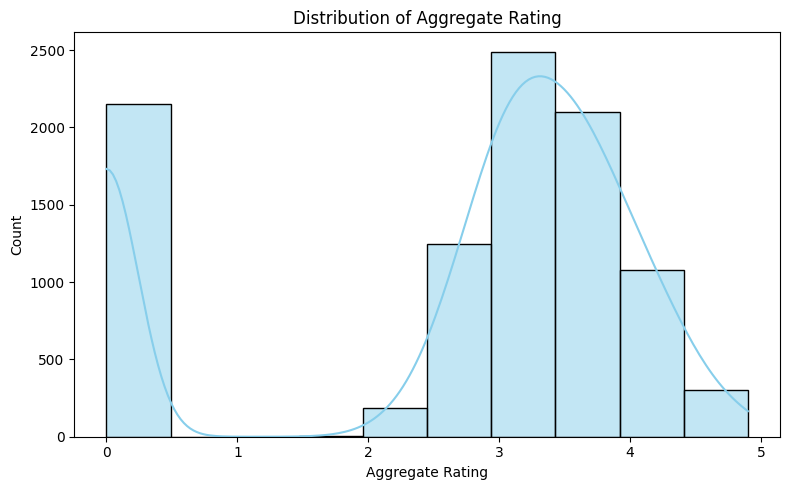


⚖️ Checking for class imbalance in 'Aggregate rating':


,Percentage
Aggregate rating,
0.0,22.489792
1.8,0.010470
1.9,0.020940
2.0,0.073291
2.1,0.157052
2.2,0.282693
2.3,0.492095
2.4,0.910899
2.5,1.151712


In [23]:
# 📥 Load the dataset
print("📥 Loading the dataset...")
df = pd.read_csv(r"C:\Users\aryak\Downloads\Dataset .csv")
print("✅ Dataset loaded successfully!")

# 🔢 Shape of dataset
print("\n🔢 Shape of the dataset:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# 🔍 Check for missing values
print("\n🔍 Missing values in each column:")
display(df.isnull().sum().to_frame("Missing Count"))

# 🧾 Data types of each column
print("\n🧾 Data types before conversion:")
display(df.dtypes.to_frame("Data Type"))

# 🔄 Convert categorical Yes/No to binary values
print("\n🔄 Converting 'Yes'/'No' to 1/0 for delivery and booking-related columns...")
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': 1, 'No': 0})
df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': 1, 'No': 0})
print("✅ Conversion complete!")

# 📊 Distribution of Aggregate Rating
print("\n📊 Plotting the distribution of 'Aggregate rating'...")
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ⚖️ Class distribution of Aggregate Rating
print("\n⚖️ Checking for class imbalance in 'Aggregate rating':")
rating_distribution = (df['Aggregate rating'].value_counts(normalize=True) * 100).sort_index()
display(rating_distribution.to_frame("Percentage"))

### 📋 2. Descriptive Statistics

- Summary statistics for numerical columns
- Frequency of categorical variables: Country Code, City, Cuisines
- Identify top cuisines and top cities

In [10]:
# 📈 Statistical summary of numerical columns
print("📈 Statistical Summary of Numerical Features:")
print(df.describe())

# 🌍 Top 5 Countries by Number of Restaurants
print("\n🌍 Top 5 Countries by Number of Restaurants:")
print(df['Country Code'].value_counts().head())

# 🏙️ Top 5 Cities by Number of Restaurants
print("\n🏙️ Top 5 Cities by Number of Restaurants:")
print(df['City'].value_counts().head())

# 🍽️ Top 10 Most Common Cuisines
print("\n🍽️ Top 10 Most Common Cuisines:")
print(df['Cuisines'].value_counts().head(10))

📈 Statistical Summary of Numerical Features:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Has Table booking  Has Online delivery  \
count           9551.000000        9551.000000          9551.000000   
mean            1199.210763           0.121244             0.256622   
std            16121.183073           0.326428             0.436792   
min                0.000000           0.000000             0.000000   
25%              250.00

### 🌐 3. Geospatial Analysis

- Plot restaurant locations
- Distribution across cities and countries
- Relationship between location and ratings

🌍 Visualizing restaurant locations by rating on a global map...


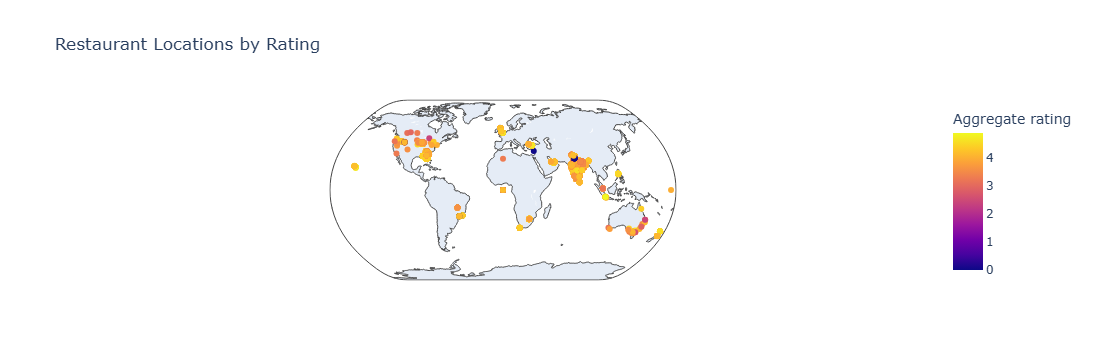


📊 Showing the top 10 cities with the highest number of restaurants...


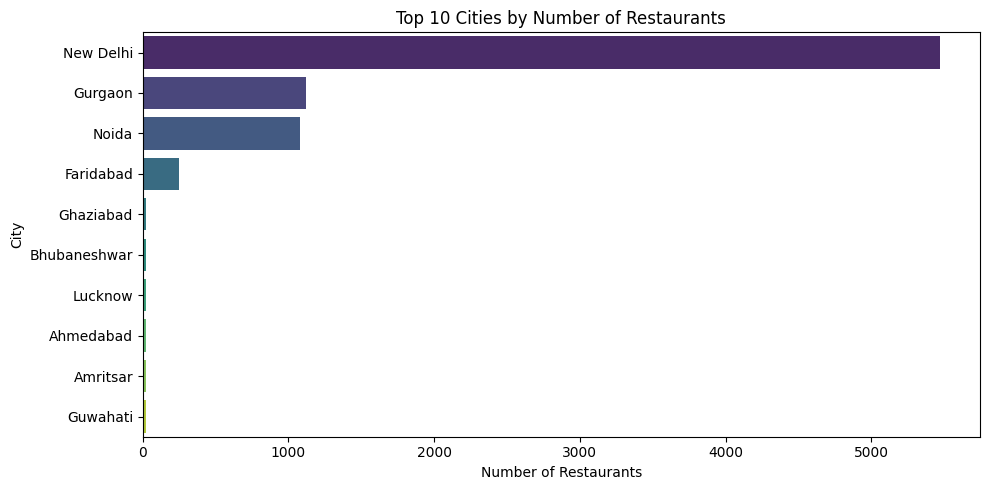


⭐ Displaying the top 10 cities with the highest average restaurant rating...


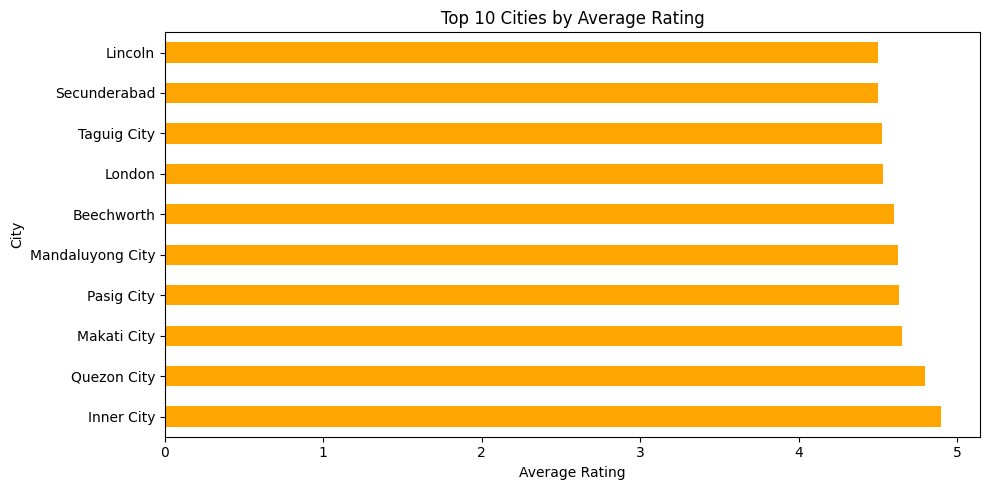

In [6]:
# 📌 Geospatial and City-Based Analysis

# 🌍 Map of Restaurant Locations
print("🌍 Visualizing restaurant locations by rating on a global map...")
fig = px.scatter_geo(df,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Restaurant Name',
                     color='Aggregate rating',
                     title='Restaurant Locations by Rating',
                     projection="natural earth")
fig.show()

# 📊 Top Cities by Number of Restaurants
print("\n📊 Showing the top 10 cities with the highest number of restaurants...")
city_counts = df['City'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="viridis")
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()

# ⭐ Top Cities by Average Rating
print("\n⭐ Displaying the top 10 cities with the highest average restaurant rating...")
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
city_rating.plot(kind='barh', color='orange')
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.tight_layout()
plt.show()

### 🍽️ Table Booking & Online Delivery Analysis

In this section, we will analyze how many restaurants provide table booking and online delivery services. We will:

- Calculate the percentage of restaurants that offer table booking and online delivery.
- Compare the average ratings of restaurants with and without table booking.
- Analyze online delivery availability across different price ranges.

In [14]:
# Percentage of restaurants offering table booking
print("📊 Percentage of restaurants offering table booking:")
table_booking_percent = df['Has Table booking'].value_counts(normalize=True) * 100
print(table_booking_percent)

# Percentage of restaurants offering online delivery
print("\n🚚 Percentage of restaurants offering online delivery:")
online_delivery_percent = df['Has Online delivery'].value_counts(normalize=True) * 100
print(online_delivery_percent)

# 📈 Average rating by table booking availability
print("\n⭐ Average Aggregate Rating by Table Booking Availability:")
avg_rating_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print(avg_rating_booking)

# 📈 Average rating by online delivery availability
print("\n⭐ Average Aggregate Rating by Online Delivery Availability:")
avg_rating_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(avg_rating_delivery)

# 📊 Online delivery across different price ranges
print("\n💰 Online Delivery Availability across Price Ranges:")
delivery_by_price = df.groupby('Price range')['Has Online delivery'].mean() * 100
print(delivery_by_price)

📊 Percentage of restaurants offering table booking:
Has Table booking
0    87.875615
1    12.124385
Name: proportion, dtype: float64

🚚 Percentage of restaurants offering online delivery:
Has Online delivery
0    74.337766
1    25.662234
Name: proportion, dtype: float64

⭐ Average Aggregate Rating by Table Booking Availability:
Has Table booking
0    2.559359
1    3.441969
Name: Aggregate rating, dtype: float64

⭐ Average Aggregate Rating by Online Delivery Availability:
Has Online delivery
0    2.465296
1    3.248837
Name: Aggregate rating, dtype: float64

💰 Online Delivery Availability across Price Ranges:
Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64


### 💰 Price Range Analysis

This section explores how restaurant pricing correlates with ratings. We will:

- Identify the most common price range among all restaurants.
- Calculate the average aggregate rating for each price range.
- Determine the rating color that corresponds to the highest-rated price range.

In [15]:
# Most common price range
print("🔢 Most common price range among all restaurants:")
common_price_range = df['Price range'].value_counts().idxmax()
print(f"Most common price range is: {common_price_range}")

# 📈 Average rating by price range
print("\n⭐ Average Aggregate Rating for each Price Range:")
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
print(avg_rating_by_price)

# 🎨 Rating color representing highest average rating price range
print("\n🎨 Rating Color for each Price Range (most frequent within group):")
color_by_price = df.groupby('Price range')['Rating color'].agg(lambda x: x.value_counts().idxmax())
print(color_by_price)

# ⬆️ Price range with highest average rating
highest_avg = avg_rating_by_price.idxmax()
print(f"\n⬆️ Price range with highest average rating: {highest_avg}")

🔢 Most common price range among all restaurants:
Most common price range is: 1

⭐ Average Aggregate Rating for each Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

🎨 Rating Color for each Price Range (most frequent within group):
Price range
1    Orange
2    Orange
3    Yellow
4    Yellow
Name: Rating color, dtype: object

⬆️ Price range with highest average rating: 4


### 🔧 Feature Engineering

In this section, we will enhance our dataset by:

- Creating new features such as:
  - Length of the restaurant name
  - Length of the address
- Encoding categorical variables like:
  - "Has Table booking"
  - "Has Online delivery"
  - "Rating color" using label encoding

In [18]:
# Creating new features
print("🔠 Creating feature: Length of Restaurant Name...")
df['Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))

print("📍 Creating feature: Length of Address...")
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

print("🎨 Encoding 'Rating color' using Label Encoding...")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Rating color encoded'] = le.fit_transform(df['Rating color'])

# Displaying final output with proper column order
print("\n✅ New Features Created:")
display_cols = ['Restaurant Name', 'Name Length', 'Address', 'Address Length', 'Rating color', 'Rating color encoded']
display(df[display_cols].head())


🔠 Creating feature: Length of Restaurant Name...
📍 Creating feature: Length of Address...
🎨 Encoding 'Rating color' using Label Encoding...

✅ New Features Created:


,Restaurant Name,Name Length,Address,Address Length,Rating color,Rating color encoded
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71,Dark Green,0
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67,Dark Green,0
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56,Green,1
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70,Dark Green,0
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64,Dark Green,0


### 📈 Predictive Modeling

In this section, we will build a regression model to predict the **Aggregate Rating** of a restaurant based on the available features.

#### Steps:
- Select relevant features for modeling
- Split the data into training and testing sets
- Train models using:
  - Linear Regression
  - Decision Tree Regressor
  - Random Forest Regressor
- Evaluate model performance using:
  - Mean Squared Error (MSE)
  - R² Score


In [19]:
# ✅ Selecting features and target
print("🎯 Selecting features and target variable...")
features = ['Price range', 'Has Table booking', 'Has Online delivery', 
            'Is delivering now', 'Switch to order menu', 
            'Name Length', 'Address Length', 'Rating color encoded']
target = 'Aggregate rating'

X = df[features]
y = df[target]

# 🔀 Train-test split
print("📊 Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📍 Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# 📊 Train and evaluate models
for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"📉 {name} - Mean Squared Error: {mse:.4f}")
    print(f"📈 {name} - R² Score: {r2:.4f}")


🎯 Selecting features and target variable...
📊 Splitting dataset into training and testing sets...

🔧 Training Linear Regression...
📉 Linear Regression - Mean Squared Error: 1.5466
📈 Linear Regression - R² Score: 0.3205

🔧 Training Decision Tree...
📉 Decision Tree - Mean Squared Error: 0.0592
📈 Decision Tree - R² Score: 0.9740

🔧 Training Random Forest...
📉 Random Forest - Mean Squared Error: 0.0393
📈 Random Forest - R² Score: 0.9827


### 📊 Customer Preference Analysis

This section explores customer preferences based on:

- Relationship between **cuisine type** and **restaurant ratings**
- Most popular cuisines based on **vote count**
- Identifying cuisines that tend to receive **higher ratings**

In [20]:
# 🧾 Average rating by cuisine
print("⭐ Average rating by cuisine (Top 10):")
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
display(avg_rating_by_cuisine)

# 🗳️ Most popular cuisines based on total votes
print("\n🔥 Top 10 most voted cuisines (by total votes):")
votes_by_cuisine = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
display(votes_by_cuisine)

# 🧠 Cuisines that are both popular (high votes) and well-rated
print("\n🎯 Top 5 cuisines with highest average rating and at least 100 total votes:")
popular_cuisines = df.groupby('Cuisines').agg({'Votes':'sum', 'Aggregate rating':'mean'})
popular_cuisines = popular_cuisines[popular_cuisines['Votes'] >= 100]
top_combo = popular_cuisines.sort_values(by='Aggregate rating', ascending=False).head(5)
display(top_combo)

⭐ Average rating by cuisine (Top 10):


Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


🔥 Top 10 most voted cuisines (by total votes):


Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


🎯 Top 5 cuisines with highest average rating and at least 100 total votes:


,Votes,Aggregate rating
Cuisines,,
"Continental, Indian",641,4.9
"American, Sandwich, Tea",1457,4.9
"European, Asian, Indian",621,4.9
"American, Caribbean, Seafood",548,4.9
"Burger, Bar Food, Steak",2238,4.9


## 📊 Data Visualization

In this section, we will create visual insights to better understand patterns in the data:

- Distribution of **Aggregate Ratings**
- Comparison of **average ratings** across different **cuisines** and **cities**
- Relationship between important features and **restaurant ratings**

📈 Visualizing the distribution of Aggregate Ratings...


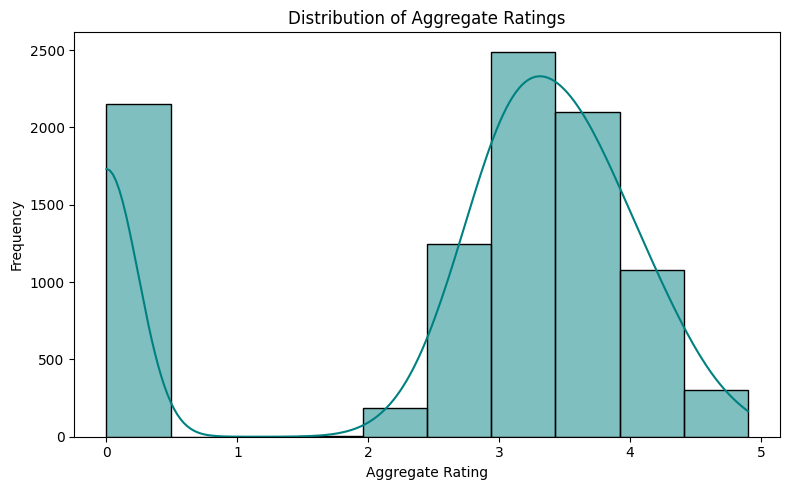


🍽️ Average Rating by Top 10 Most Common Cuisines...


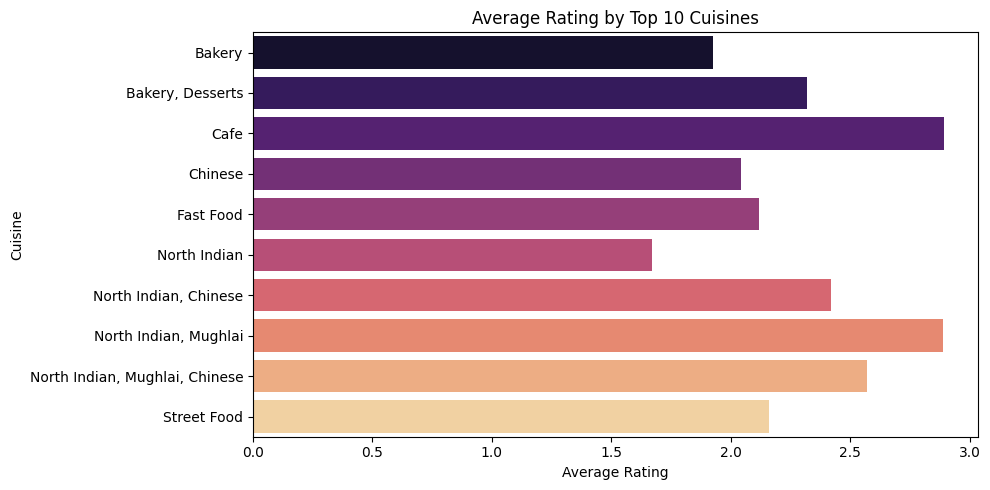


🏙️ Average Rating by Top 10 Cities...


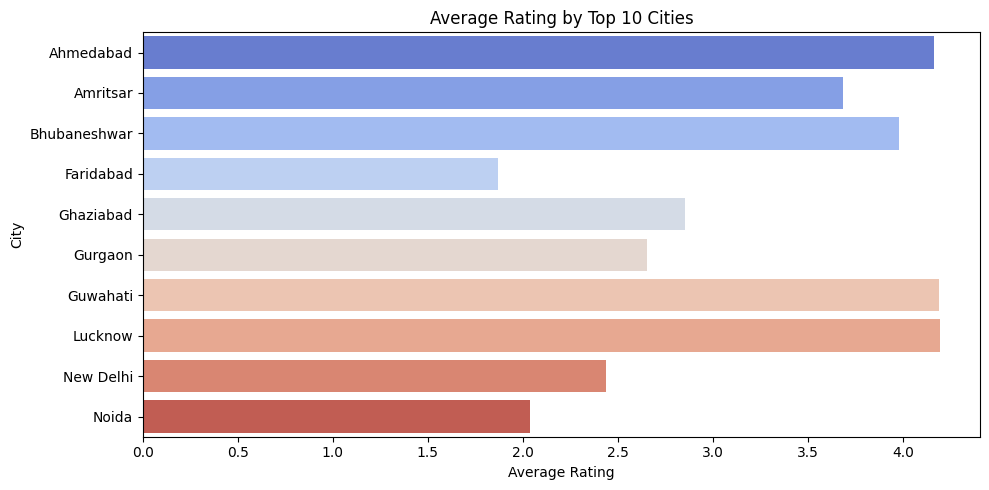

In [22]:
# ⭐ Distribution of Aggregate Ratings
print("📈 Visualizing the distribution of Aggregate Ratings...")
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color='teal')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 🍽️ Average Rating by Top 10 Cuisines
print("\n🍽️ Average Rating by Top 10 Most Common Cuisines...")
top_cuisines = df['Cuisines'].value_counts().head(10).index
avg_rating_top_cuisines = df[df['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating_top_cuisines.values, y=avg_rating_top_cuisines.index, palette="magma")
plt.title("Average Rating by Top 10 Cuisines")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

# 🏙️ Average Rating by Top 10 Cities
print("\n🏙️ Average Rating by Top 10 Cities...")
top_cities = df['City'].value_counts().head(10).index
avg_rating_top_cities = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating_top_cities.values, y=avg_rating_top_cities.index, palette="coolwarm")
plt.title("Average Rating by Top 10 Cities")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.tight_layout()
plt.show()


### 🔎 Rating Trend Across Price & Votes

This section investigates how restaurant ratings are affected by both their price range and popularity (measured through votes).

📊 Scatterplot: Votes vs Aggregate Rating (Colored by Price Range)...


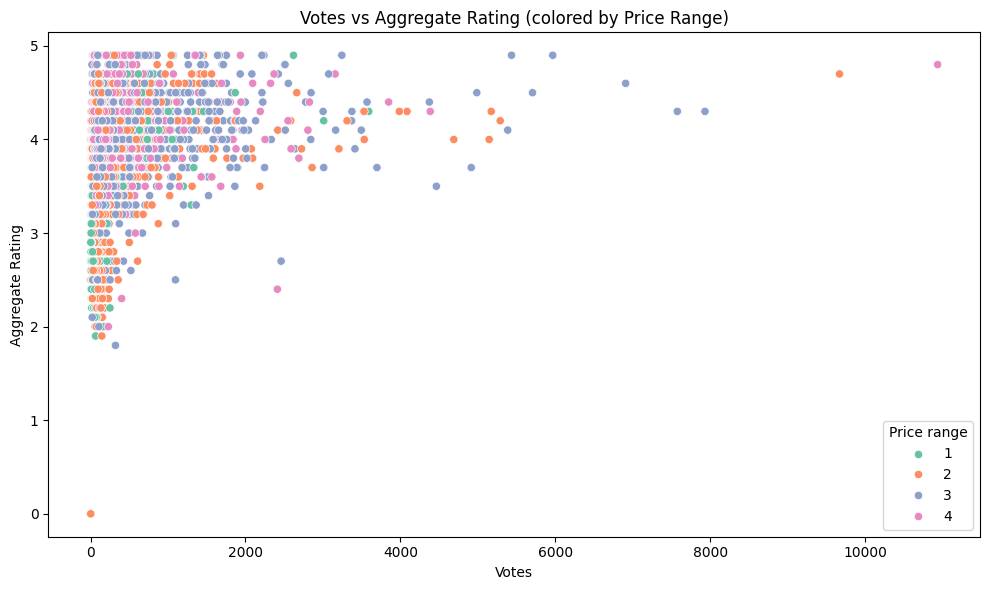

In [24]:
# Average rating vs price range and votes
print("📊 Scatterplot: Votes vs Aggregate Rating (Colored by Price Range)...")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', hue='Price range', palette='Set2')
plt.title("Votes vs Aggregate Rating (colored by Price Range)")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.tight_layout()
plt.show()

### 🌍 Country-wise Restaurant Distribution

This section analyzes how restaurants are distributed across countries, which can help understand market concentration.

### 🎯 Top Rated Restaurants Overview

Highlight restaurants with the maximum ratings and votes, showcasing exceptional performers.

In [25]:
# Top 5 restaurants by rating and votes
print("🏆 Top 5 Restaurants by Aggregate Rating:")
display(df.sort_values(by='Aggregate rating', ascending=False)[['Restaurant Name', 'City', 'Cuisines', 'Aggregate rating']].head())

print("\n🔥 Top 5 Most Voted Restaurants:")
display(df.sort_values(by='Votes', ascending=False)[['Restaurant Name', 'City', 'Cuisines', 'Votes']].head())

🏆 Top 5 Restaurants by Aggregate Rating:


,Restaurant Name,City,Cuisines,Aggregate rating
8,Spiral - Sofitel Philippine Plaza Manila,Pasay City,"European, Asian, Indian",4.9
10,Silantro Fil-Mex,Pasig City,"Filipino, Mexican",4.9
3,Ooma,Mandaluyong City,"Japanese, Sushi",4.9
9458,Urbanologi,Inner City,Tapas,4.9
507,Mazzaro's Italian Market,Tampa Bay,"Italian, Deli",4.9



🔥 Top 5 Most Voted Restaurants:


,Restaurant Name,City,Cuisines,Votes
728,Toit,Bangalore,"Italian, American, Pizza",10934
735,Truffles,Bangalore,"American, Burger, Cafe",9667
3994,Hauz Khas Social,New Delhi,"Continental, American, Asian, North Indian",7931
2412,Peter Cat,Kolkata,"Continental, North Indian",7574
739,AB's - Absolute Barbecues,Bangalore,"European, Mediterranean, North Indian",6907


### ⚠️ Outlier Detection in Votes and Cost

We’ll detect restaurants that charge extremely high or receive unusually high/low votes to investigate potential anomalies.

In [26]:
# Detect outliers in 'Votes'
print("🔍 Top 5 restaurants with unusually high number of votes:")
display(df[df['Votes'] > df['Votes'].quantile(0.99)][['Restaurant Name', 'Votes', 'City', 'Aggregate rating']])

# Detect outliers in 'Average Cost for two'
print("\n💸 Restaurants with extremely high costs:")
display(df[df['Average Cost for two'] > df['Average Cost for two'].quantile(0.99)][['Restaurant Name', 'Average Cost for two', 'City']])

🔍 Top 5 restaurants with unusually high number of votes:


,Restaurant Name,Votes,City,Aggregate rating
355,Texas de Brazil,2324,Orlando,4.6
369,The Ravenous Pig,1998,Orlando,4.4
374,McGuire's Irish Pub & Brewery,2238,Pensacola,4.9
501,Bern's Steak House,3157,Tampa Bay,4.7
511,Datz,3074,Tampa Bay,4.7
...,...,...,...,...
7863,Big Yellow Door,3986,New Delhi,4.3
8434,Desi Vibes,2019,Noida,3.8
9157,Le Plaisir,2510,Pune,4.8
9167,Barbeque Nation,2847,Pune,4.5



💸 Restaurants with extremely high costs:


,Restaurant Name,Average Cost for two,City
2,Heat - Edsa Shangri-La,4000,Mandaluyong City
8,Spiral - Sofitel Philippine Plaza Manila,6000,Pasay City
633,Dawat-e-Nawab - Radisson Blu,3600,Agra
1216,Cafe G - Crowne Plaza,3500,Gurgaon
1217,Wildfire - Crowne Plaza,5000,Gurgaon
...,...,...,...
9296,Talaga Sampireun,200000,Tangerang
9504,T.G.I. Friday's,4000,Colombo
9506,Cafe Shaze,3500,Colombo
9512,The Manhattan Fish Market,4500,Colombo


### 🌍 Country-wise Restaurant Distribution (With Country Names)

We map numeric country codes to actual country names and then analyze the top countries based on the number of restaurants listed in the dataset.

In [27]:
# 🌍 Mapping Country Code to Country Name

print("🔄 Mapping country codes to names...")

# Create a country code-to-name dictionary (expand as needed)
country_map = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Philippines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States"
}

# Apply the mapping
df['Country'] = df['Country Code'].map(country_map)

# ✅ Check if mapping was successful
print("🗺️ Country mapping preview:")
display(df[['Country Code', 'Country']].drop_duplicates().sort_values(by='Country Code'))

# 🌍 Top countries by restaurant count
print("\n📊 Top 5 Countries by Number of Restaurants:")
top_countries_named = df['Country'].value_counts().head()
display(top_countries_named.to_frame("Restaurant Count"))

🔄 Mapping country codes to names...
🗺️ Country mapping preview:


,Country Code,Country
624,1,India
102,14,Australia
22,30,Brazil
185,37,Canada
9276,94,Indonesia
9297,148,New Zealand
0,162,Philippines
9417,166,Qatar
456,184,Singapore
9437,189,South Africa



📊 Top 5 Countries by Number of Restaurants:


,Restaurant Count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
